# Classification Module
Within this module we will predict if the flight is going to be delayed or not and classify them into those two categories

We will first work with unsampled data from the previous module [Data-Preprocessing, merging the flight data and weather data](https://github.com/GV-9wj/Flight_Delay_Prediction/blob/master/Datapreprocessing3_Merging_Data.ipynb).

After we have seen the classification reports for these modules we will move onto sampled data. We will work with Undersampling and oversampling(SMOTE).

#### Objectives:
1. To classify the given flight as delayed or not using classification models.
2. Run the classification models on unsampled data and print the report for each model.
3. Run the classification models on undersampled data and print the report for each model.
4. Run the classification models on oversampled data and print the report for each model.

#### Classification models used:
1. Logistic regression : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. Random Forest : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
3. Extra trees : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
4. Decision Trees : [LOOKUP](https://scikit-learn.org/stable/modules/tree.html)
5. Gradient Boosting Classifier : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
6. Bagging : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#:~:text=A%20Bagging%20classifier.,to%20form%20a%20final%20prediction.)

In [1]:
# First let us import all the different libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Looking at the dataframe
Let us look at the dataframe for a little bit of insight into the data

In [2]:
# Readinbg the file 
df = pd.read_csv("Data/Merged_Flight_Weather.csv", index_col = 0)
df = df.drop(columns=['Unnamed: 0.1', 'date', 'Quarter', 'Year', 'Month', 'DayofMonth','DepDel15', 'DepTime', 
                      'Origin', 'ArrTime', 'FlightDate', 'airport', 'DepDelayMinutes', 'CRSArrTime'])
df.head()

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ArrDel15,ArrDelayMinutes,CRSDepTime,DestAirportID,OriginAirportID,DeptTime,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
0,0.0,8.0,745,12478,14747,800,7,108,113,0.0,10,1030,0,23,8,34,29,65,800
1,1.0,33.0,820,14107,14747,800,7,108,113,0.0,10,1030,0,23,8,34,29,65,800
2,0.0,0.0,759,11292,14747,800,7,108,113,0.0,10,1030,0,23,8,34,29,65,800
3,0.0,10.0,738,12266,14747,800,7,108,113,0.0,10,1030,0,23,8,34,29,65,800
4,0.0,0.0,745,10397,14747,800,7,108,113,0.0,10,1030,0,23,8,34,29,65,800


In [3]:
# We look at the colums first then the shape
df.columns

Index(['ArrDel15', 'ArrDelayMinutes', 'CRSDepTime', 'DestAirportID',
       'OriginAirportID', 'DeptTime', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'time'],
      dtype='object')

In [4]:
# Now the shape of the dataframe
df.shape

(1873584, 19)

In [5]:
# Check for missing valuiesa
df.isna().sum()

ArrDel15           0
ArrDelayMinutes    0
CRSDepTime         0
DestAirportID      0
OriginAirportID    0
DeptTime           0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
time               0
dtype: int64

In [6]:
# Looking at the data types of all features
df.dtypes

ArrDel15           float64
ArrDelayMinutes    float64
CRSDepTime           int64
DestAirportID        int64
OriginAirportID      int64
DeptTime             int64
windspeedKmph        int64
winddirDegree        int64
weatherCode          int64
precipMM           float64
visibility           int64
pressure             int64
cloudcover           int64
DewPointF            int64
WindGustKmph         int64
tempF                int64
WindChillF           int64
humidity             int64
time                 int64
dtype: object

In [7]:
df["OriginAirportID"] = df["OriginAirportID"].astype('category')
df["DestAirportID"] = df["DestAirportID"].astype('category')

In [8]:
df.dtypes

ArrDel15            float64
ArrDelayMinutes     float64
CRSDepTime            int64
DestAirportID      category
OriginAirportID    category
DeptTime              int64
windspeedKmph         int64
winddirDegree         int64
weatherCode           int64
precipMM            float64
visibility            int64
pressure              int64
cloudcover            int64
DewPointF             int64
WindGustKmph          int64
tempF                 int64
WindChillF            int64
humidity              int64
time                  int64
dtype: object

In [9]:
df["OriginAirportID"] = df["OriginAirportID"].cat.codes
df["OriginAirportID"].value_counts()

8     212460
14    170780
11    153564
0     150084
2     144224
7     134172
3     127654
12    117254
13    115376
9      99086
4      98786
6      94366
5      91738
1      85898
10     78142
Name: OriginAirportID, dtype: int64

In [10]:
df["DestAirportID"] = df["DestAirportID"].cat.codes
df["DestAirportID"].value_counts()

8     213468
14    170394
11    153472
0     151050
2     142188
7     134364
3     127260
12    116946
13    115564
4      99324
9      99196
6      94350
5      91960
1      85828
10     78220
Name: DestAirportID, dtype: int64

##### Feature exploration
Since there are no missing values we can continue further and look at the corellation between various features of the dataframe

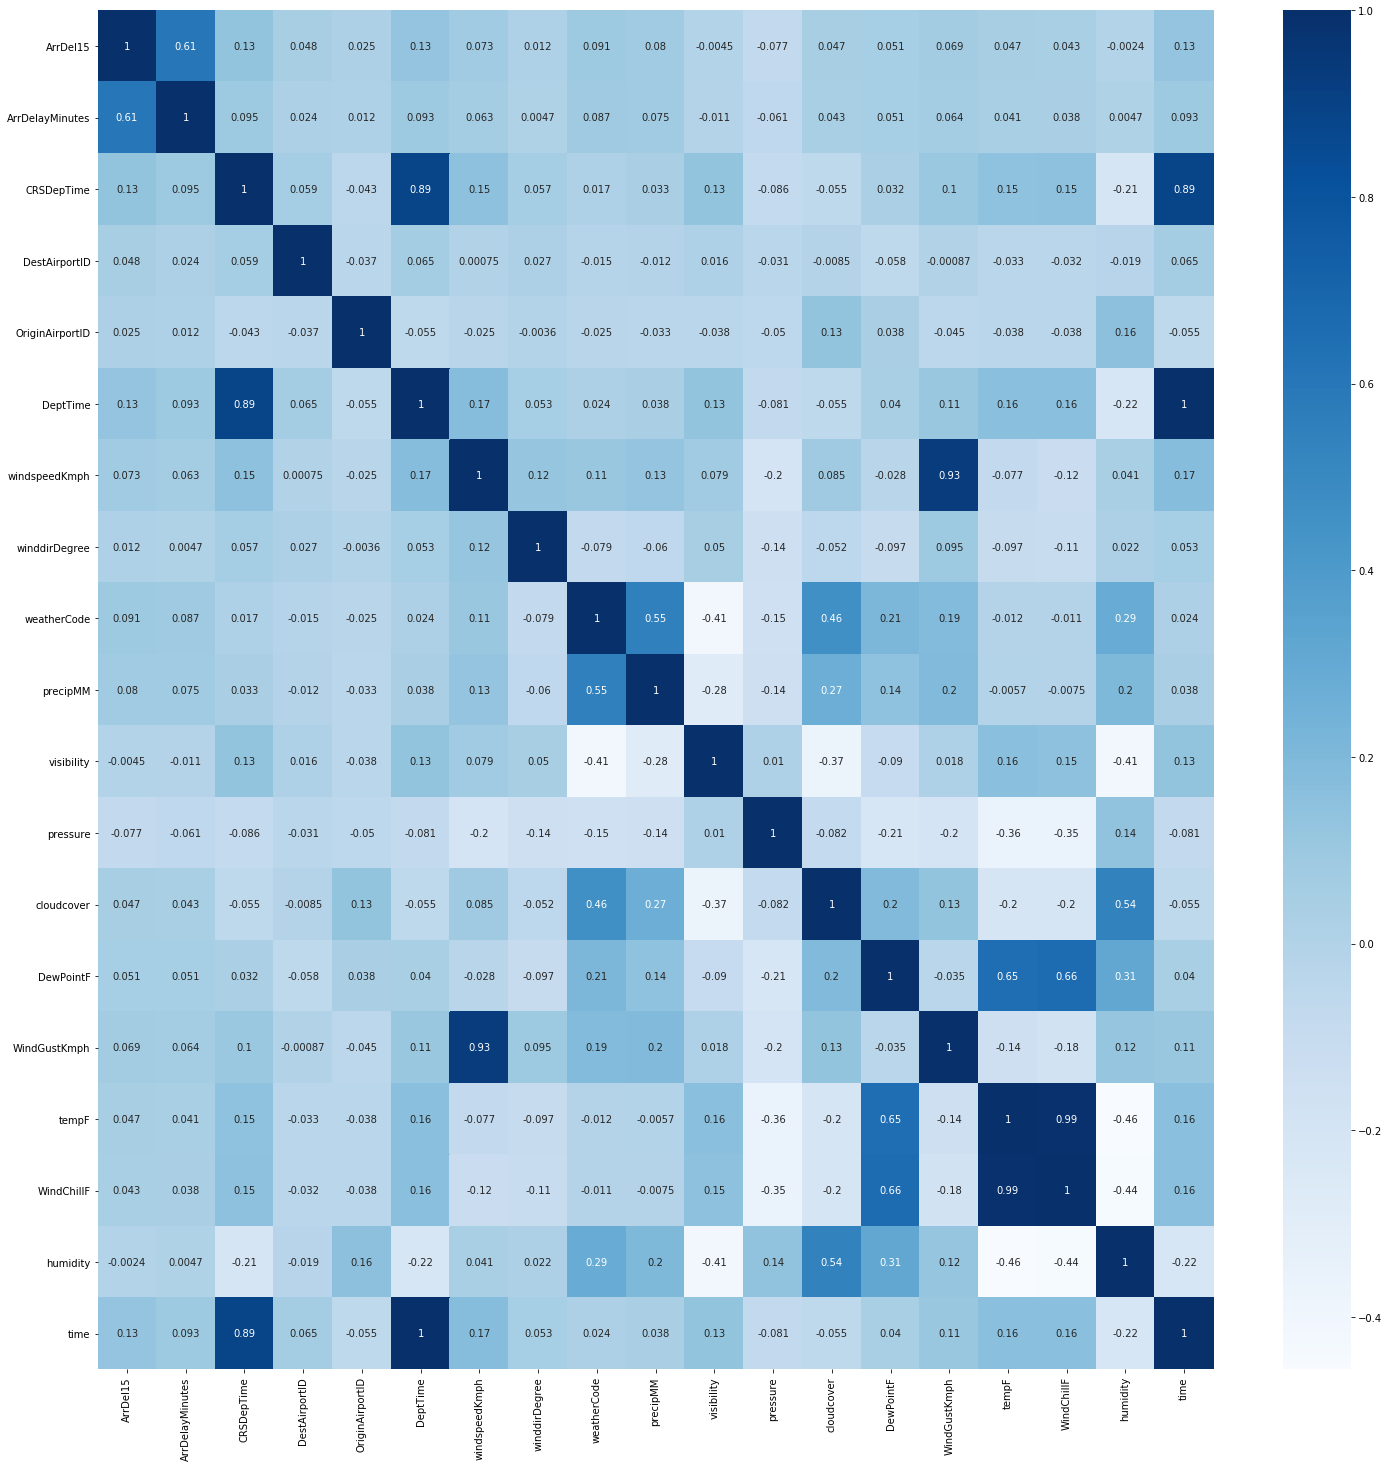

In [11]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

# Un-Sampled Data
We will work the above classifier models using unsampled data, i.e data that has not be altered and predict if the flight is on time or delayed

In this dataframe the variable we need to predict is '`ArrDel15` and therefore we need to divide it into two variables:
* `X` - the input variable which helps us predict, which is all features except for `Arrdel15` and `ArrDelayMinutes`
* `y` - the output variable or the predictor variable, which is basically the column `ArrDel15`

We must then split them into train and test datasets using an inbuilt function from scikit learn called train_test_split : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [12]:
y = df['ArrDel15']
X = df.drop(columns=['ArrDel15', 'ArrDelayMinutes'])
# Spplitting the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

## Accuracy measurement
There are also a few metrics that we use for checking the accuracy of our model. Some of them are
1. model.score() - which evaluvates the score of our model based on our feature variables and predictor variables
2. A classification report that gives us the precision and the recall and also the F1 score, where:
    1. Precision is the fraction of how many of the items that are selected are relevant.
    2. Recall is the fraction of how many relevant items are selected.
3. A confusion matrix which gives us a matrix of the true negatives($C_{0, 0}$), false negatives($C_{1, 0}$), true positives($C_{0, 1}$) false positives($C_{1, 1}$)

In [13]:
import sklearn.metrics

### METHOD
Nearly all our classifiers follow the following method which is
1. Call the classifier
2. Fit it with out train data
3. Run the accuracy metrics for our model

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier = logistic_model.fit(X_train, y_train)

In [16]:
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier.score(X_train, 
                                                                                   y_train)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_logistic)))

Logistic regression Train Accuracy : 79.44182557778745 %

Logistic regression Test Accuracy : 79.46716026609963 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89    372206
         1.0       0.51      0.00      0.01     96190

    accuracy                           0.79    468396
   macro avg       0.65      0.50      0.45    468396
weighted avg       0.74      0.79      0.70    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[371921    285]
 [ 95890    300]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
random_forest_model = RandomForestClassifier()
random_forest_classifier = random_forest_model.fit(X_train,y_train)

In [19]:
y_pred_randomforest = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier.score(X_train,
                                                                                            y_train)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest)))

Random Forest Clasifier Train Accuracy : 99.58325861023579 %

Random Forest Clasifier Test Accuracy : 93.90643814208491 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    372206
         1.0       0.88      0.81      0.85     96190

    accuracy                           0.94    468396
   macro avg       0.92      0.89      0.90    468396
weighted avg       0.94      0.94      0.94    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[361948  10258]
 [ 18284  77906]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier = extra_trees_model.fit(X_train, y_train)

In [22]:
y_pred_extratrees = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier.score(X_train,
                                                                                        y_train)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                    y_pred_extratrees)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees)))

Extra trees Clasifier Train Accuracy : 99.58503773160602 %

Extra trees  Clasifier Test Accuracy : 93.78068984363658 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    372206
         1.0       0.88      0.81      0.84     96190

    accuracy                           0.94    468396
   macro avg       0.92      0.89      0.90    468396
weighted avg       0.94      0.94      0.94    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[361427  10779]
 [ 18352  77838]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier = decision_trees_model.fit(X_train, y_train)

In [25]:
y_pred_decisiontrees = extra_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier.score(X_train,
                                                                                           y_train)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees)))

Decision Trees Clasifier Train Accuracy : 99.58503773160602 %

Decision Trees Clasifier Test Accuracy : 93.78068984363658 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    372206
         1.0       0.88      0.81      0.84     96190

    accuracy                           0.94    468396
   macro avg       0.92      0.89      0.90    468396
weighted avg       0.94      0.94      0.94    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[361427  10779]
 [ 18352  77838]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf = gradient_boost_model.fit(X_train, y_train)

In [28]:
y_pred_gradientboost = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf.score(X_train,
                                                                                         y_train)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                        y_pred_gradientboost)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_gradientboost)))

Gradient Booster Clasifier Train Accuracy : 79.65752625271494 %

Gradient Booster Clasifier Test Accuracy : 79.66506972732475 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89    372206
         1.0       0.66      0.02      0.04     96190

    accuracy                           0.80    468396
   macro avg       0.73      0.51      0.46    468396
weighted avg       0.77      0.80      0.71    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[371185   1021]
 [ 94227   1963]]


## Bagging Classiifier
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such  meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [29]:
from sklearn.ensemble import BaggingClassifier

In [30]:
# The default type of a bagging classifier is a decision tree
bagging_model = BaggingClassifier(n_estimators=10, random_state=0)
bagging_classifier = bagging_model.fit(X_train, y_train)

In [31]:
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Clasifier Train Accuracy : {} %".format(bagging_classifier.score(X_train,
                                                                                y_train)*100))
print("\nBagging Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                               y_pred_randomforest)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_bagging)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_bagging)))

Bagging Clasifier Train Accuracy : 98.95288032633356 %

Bagging Clasifier Test Accuracy : 93.90643814208491 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95    372206
         1.0       0.87      0.73      0.79     96190

    accuracy                           0.92    468396
   macro avg       0.90      0.85      0.87    468396
weighted avg       0.92      0.92      0.92    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[362130  10076]
 [ 26222  69968]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [32]:
import xgboost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xbgoost_classifier = xgboost_model.fit(X_train, y_train)

In [33]:
y_pred_xgboost = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xbgoost_classifier.score(X_train, y_train)*100))
print("\nXGBoost Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, y_pred_xgboost)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, y_pred_xgboost)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, y_pred_xgboost)))

XGBoost Clasifier Train Accuracy : 80.66529176167174 %

XGBoost Trees Clasifier Test Accuracy : 80.5085867513813 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.81      0.99      0.89    372206
         1.0       0.70      0.09      0.16     96190

    accuracy                           0.81    468396
   macro avg       0.75      0.54      0.52    468396
weighted avg       0.79      0.81      0.74    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[368440   3766]
 [ 87531   8659]]


# Sampled Data
We will now work out models on oversampled and undersampled data.
For the purpose of this project we will be looking at:
* SMOTE oversampling [LOOKUP](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)
* Random Undersampling [LOOKUP](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html)

## Considering SMOTE (Synthetic Minority Oversampling Technique)
SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

In [34]:
# Looking at the original value counts
print("Original Number of values: \n{}".format(y_train.value_counts()))

Original Number of values: 
0.0    1116378
1.0     288810
Name: ArrDel15, dtype: int64


In [35]:
import imblearn.over_sampling
over_sampler_SMOTE = imblearn.over_sampling.SMOTE(random_state = 285)
X_train_SMOTE, y_train_SMOTE = over_sampler_SMOTE.fit_resample(X_train, y_train)

# Now looking at the values for y_train
print("Values after SMOTE: \n{}".format(y_train_SMOTE.value_counts()))

Values after SMOTE: 
1.0    1116378
0.0    1116378
Name: ArrDel15, dtype: int64


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier_SMOTE = logistic_model.fit(X_train_SMOTE, y_train_SMOTE)

In [38]:
y_pred_logistic_SMOTE = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier_SMOTE.score(X_train_SMOTE,
                                                                                         y_train_SMOTE)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, y_pred_logistic_SMOTE)))

Logistic regression Train Accuracy : 58.802394887753074 %

Logistic regression Test Accuracy : 57.77824746581952 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.57      0.68    372206
         1.0       0.27      0.61      0.37     96190

    accuracy                           0.58    468396
   macro avg       0.56      0.59      0.53    468396
weighted avg       0.73      0.58      0.62    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[211772 160434]
 [ 37331  58859]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forest_model = RandomForestClassifier()
random_forest_classifier_SMOTE = random_forest_model.fit(X_train_SMOTE,y_train_SMOTE)

In [41]:
y_pred_randomforest_SMOTE = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier_SMOTE.score(X_train_SMOTE, 
                                                                                                  y_train_SMOTE)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest_SMOTE)))

Random Forest Clasifier Train Accuracy : 99.63381578640926 %

Random Forest Clasifier Test Accuracy : 93.1077549765583 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    372206
         1.0       0.83      0.83      0.83     96190

    accuracy                           0.93    468396
   macro avg       0.90      0.89      0.89    468396
weighted avg       0.93      0.93      0.93    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[356330  15876]
 [ 16407  79783]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

In [43]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier_SMOTE = extra_trees_model.fit(X_train_SMOTE,y_train_SMOTE)

In [44]:
y_pred_extratrees_SMOTE = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier_SMOTE.score(X_train_SMOTE,
                                                                                              y_train_SMOTE)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_extratrees_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees_SMOTE)))

Extra trees Clasifier Train Accuracy : 99.63453238956697 %

Extra trees  Clasifier Test Accuracy : 93.18418603062366 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    372206
         1.0       0.84      0.83      0.83     96190

    accuracy                           0.93    468396
   macro avg       0.90      0.89      0.89    468396
weighted avg       0.93      0.93      0.93    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[357105  15101]
 [ 16824  79366]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [45]:
from sklearn.tree import DecisionTreeClassifier
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier_SMOTE = decision_trees_model.fit(X_train_SMOTE, y_train_SMOTE)

In [46]:
y_pred_decisiontrees_SMOTE = decision_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(decision_trees_classifier_SMOTE.score(X_train,
                                                                                                    y_train)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees_SMOTE)))

Decision Trees Clasifier Train Accuracy : 99.55728343823033 %

Decision Trees Clasifier Test Accuracy : 91.79946028574113 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95    372206
         1.0       0.78      0.84      0.81     96190

    accuracy                           0.92    468396
   macro avg       0.87      0.89      0.88    468396
weighted avg       0.92      0.92      0.92    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[349371  22835]
 [ 15576  80614]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf_SMOTE = gradient_boost_model.fit(X_train, y_train)

In [49]:
y_pred_gradientboost_SMOTE = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf_SMOTE.score(X_train,
                                                                                               y_train)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                               y_pred_gradientboost_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test,
                                                                            y_pred_gradientboost_SMOTE)))

Gradient Booster Clasifier Train Accuracy : 79.65752625271494 %

Gradient Booster Clasifier Test Accuracy : 79.66506972732475 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89    372206
         1.0       0.66      0.02      0.04     96190

    accuracy                           0.80    468396
   macro avg       0.73      0.51      0.46    468396
weighted avg       0.77      0.80      0.71    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[371185   1021]
 [ 94227   1963]]


## Bagging Classiifier
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such  meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
# The default type of a bagging classifier is a decision tree
bagging_model = BaggingClassifier(n_estimators=10, random_state=0)
bagging_classifier_SMOTE = bagging_model.fit(X_train, y_train)

In [52]:
y_pred_bagging_SMOTE = bagging_model.predict(X_test)
print("Bagging Clasifier Train Accuracy : {} %".format(bagging_classifier_SMOTE.score(X_train,
                                                                                      y_train)*100))
print("\nBagging Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                               y_pred_bagging_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_bagging_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_bagging_SMOTE)))

Bagging Clasifier Train Accuracy : 98.95288032633356 %

Bagging Clasifier Test Accuracy : 92.2505743003783 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95    372206
         1.0       0.87      0.73      0.79     96190

    accuracy                           0.92    468396
   macro avg       0.90      0.85      0.87    468396
weighted avg       0.92      0.92      0.92    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[362130  10076]
 [ 26222  69968]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [53]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_classifier_SMOTE = xgboost_model.fit(X_train_SMOTE, y_train_SMOTE)

In [54]:
y_pred_xgboost_SMOTE = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xgboost_classifier_SMOTE.score(X_train_SMOTE, 
                                                                                           y_train_SMOTE)*100))
print("\nXGBoost Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                              y_pred_xgboost_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_xgboost_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_xgboost_SMOTE)))

XGBoost Clasifier Train Accuracy : 70.55164111080656 %

XGBoost Clasifier Test Accuracy : 68.63188413223 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.73      0.79    372206
         1.0       0.33      0.52      0.40     96190

    accuracy                           0.69    468396
   macro avg       0.59      0.62      0.60    468396
weighted avg       0.75      0.69      0.71    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[271580 100626]
 [ 46301  49889]]


## Considering Random Undersampling

In [55]:
# Looking at the original value counts
print("Original Number of values: \n{}".format(y_train.value_counts()))

Original Number of values: 
0.0    1116378
1.0     288810
Name: ArrDel15, dtype: int64


In [56]:
from imblearn.under_sampling import RandomUnderSampler
random_under_sampler = RandomUnderSampler(random_state = 285)
X_train_RUS, y_train_RUS = random_under_sampler.fit_resample(X_train,y_train)
print("Values after Random Under Sampling: \n{}".format(y_train_RUS.value_counts()))

Values after Random Under Sampling: 
1.0    288810
0.0    288810
Name: ArrDel15, dtype: int64


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier_RUS = logistic_model.fit(X_train_RUS, y_train_RUS)

In [59]:
y_pred_logistic_RUS = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier_RUS.score(X_train_RUS, 
                                                                                   y_train_RUS)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_logistic_RUS)))

Logistic regression Train Accuracy : 59.20432118001454 %

Logistic regression Test Accuracy : 58.284656572643655 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.58      0.69    372206
         1.0       0.27      0.61      0.37     96190

    accuracy                           0.58    468396
   macro avg       0.56      0.59      0.53    468396
weighted avg       0.73      0.58      0.62    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[214594 157612]
 [ 37781  58409]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
random_forest_model = RandomForestClassifier()
random_forest_classifier_RUS = random_forest_model.fit(X_train_RUS, y_train_RUS)

In [62]:
y_pred_randomforest_RUS = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier_RUS.score(X_train_RUS,
                                                                                            y_train_RUS)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest_RUS)))

Random Forest Clasifier Train Accuracy : 99.7025726256016 %

Random Forest Clasifier Test Accuracy : 79.44196790749707 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.77      0.86    372206
         1.0       0.50      0.89      0.64     96190

    accuracy                           0.79    468396
   macro avg       0.73      0.83      0.75    468396
weighted avg       0.87      0.79      0.81    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[286956  85250]
 [ 11043  85147]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier_RUS = extra_trees_model.fit(X_train_RUS, y_train_RUS)

In [65]:
y_pred_extratrees_RUS = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier.score(X_train_RUS,
                                                                                        y_train_RUS)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                    y_pred_extratrees_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees_RUS)))

Extra trees Clasifier Train Accuracy : 99.1293584017174 %

Extra trees  Clasifier Test Accuracy : 80.6845062724703 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.79      0.87    372206
         1.0       0.52      0.87      0.65     96190

    accuracy                           0.81    468396
   macro avg       0.74      0.83      0.76    468396
weighted avg       0.87      0.81      0.82    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[294002  78204]
 [ 12269  83921]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier_RUS = decision_trees_model.fit(X_train_RUS, y_train_RUS)

In [68]:
y_pred_decisiontrees_RUS = extra_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier_RUS.score(X_train_RUS,
                                                                                           y_train_RUS)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees_RUS)))

Decision Trees Clasifier Train Accuracy : 99.7036113707974 %

Decision Trees Clasifier Test Accuracy : 80.6845062724703 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.79      0.87    372206
         1.0       0.52      0.87      0.65     96190

    accuracy                           0.81    468396
   macro avg       0.74      0.83      0.76    468396
weighted avg       0.87      0.81      0.82    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[294002  78204]
 [ 12269  83921]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf_RUS = gradient_boost_model.fit(X_train_RUS, y_train_RUS)

In [71]:
y_pred_gradientboost_RUS = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf.score(X_train_RUS,
                                                                                         y_train_RUS)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                        y_pred_gradientboost_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_gradientboost_RUS)))

Gradient Booster Clasifier Train Accuracy : 50.91565389010076 %

Gradient Booster Clasifier Test Accuracy : 61.18839614343419 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.61      0.71    372206
         1.0       0.29      0.62      0.40     96190

    accuracy                           0.61    468396
   macro avg       0.58      0.62      0.56    468396
weighted avg       0.75      0.61      0.65    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[226634 145572]
 [ 36220  59970]]


## Bagging Classiifier
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such  meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [72]:
from sklearn.ensemble import BaggingClassifier

In [73]:
# The default type of a bagging classifier is a decision tree
bagging_model = BaggingClassifier(n_estimators=10, random_state=0)
bagging_classifier_RUS = bagging_model.fit(X_train_RUS, y_train_RUS)

In [74]:
y_pred_bagging_RUS = bagging_model.predict(X_test)
print("Bagging Clasifier Train Accuracy : {} %".format(bagging_classifier.score(X_train_RUS,
                                                                                y_train_RUS)*100))
print("\nBagging Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                               y_pred_randomforest_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_bagging_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_bagging_RUS)))

Bagging Clasifier Train Accuracy : 97.88909663792805 %

Bagging Clasifier Test Accuracy : 79.44196790749707 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.79      0.86    372206
         1.0       0.51      0.84      0.64     96190

    accuracy                           0.80    468396
   macro avg       0.73      0.82      0.75    468396
weighted avg       0.86      0.80      0.82    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[294987  77219]
 [ 15374  80816]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [75]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_classifier_RUS = xgboost_model.fit(X_train_RUS, y_train_RUS)

In [76]:
y_pred_xgboost_RUS = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xgboost_classifier_RUS.score(X_train_RUS, 
                                                                                           y_train_RUS)*100))
print("\nXGBoost Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                              y_pred_xgboost_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_xgboost_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_xgboost_RUS)))

XGBoost Clasifier Train Accuracy : 66.12513417125446 %

XGBoost Clasifier Test Accuracy : 64.70657307064963 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.88      0.65      0.74    372206
         1.0       0.32      0.64      0.43     96190

    accuracy                           0.65    468396
   macro avg       0.60      0.65      0.59    468396
weighted avg       0.76      0.65      0.68    468396

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[241213 130993]
 [ 34320  61870]]
